In [1]:
from mis import Mis
import numpy as np

In [2]:
# Instancio la clase Mis

mis = Mis()

In [8]:
# Opcion 1: Crear una matriz de incidencia aleatoria

cantidad_vertices = 70

matrix = mis.random_incidence_matrix(cantidad_vertices)

print(matrix)

[[1 1 0 ... 0 0 0]
 [1 1 1 ... 1 0 1]
 [0 0 0 ... 0 1 1]
 ...
 [0 1 0 ... 0 1 0]
 [1 1 1 ... 1 1 1]
 [0 0 1 ... 1 1 0]]


In [3]:
# Opcion 2: Crear una matriz de incidencia propia y setearla

my_matrix = np.array(
    [[0, 1, 0, 1], 
    [1, 0, 1, 0],
    [0, 1, 1, 0], 
    [1, 1, 1, 0]]
)

print(my_matrix)

mis.set_incidence_matrix(my_matrix)

[[0 1 0 1]
 [1 0 1 0]
 [0 1 1 0]
 [1 1 1 0]]


In [3]:
# Opcion 3: Crear una lista de conexiones y setearla

my_edge_list = [(0, 1), (1, 2), (1, 3), (2, 3), (4, 5), (5, 2)]

mis.set_edge_list(my_edge_list)

In [8]:
# Opcion 4: Crear una matriz de incidencia aleatoria con un porcentaje de conexion entre nodos
# Opcion ideal para grafos con gran cantidad de nodos

porcentaje = 0.10
cant_vertices = 20

matrix = mis.random_matrix_with_porc(cant_vertices, porcentaje)

print(matrix)

[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
 [1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0]]


{0: [17, 18, 6, 7],
 1: [3, 4, 6, 8, 9, 17],
 2: [10, 11, 6, 7],
 3: [1, 11, 6],
 4: [1, 5, 6],
 5: [4, 6, 9, 12, 14, 18],
 6: [0, 1, 2, 3, 4, 5, 12, 15, 16],
 7: [0, 2, 13, 14, 19],
 8: [1, 12],
 9: [1, 5, 17],
 10: [17, 2, 19],
 11: [2, 3],
 12: [5, 6, 8, 16, 17],
 13: [7],
 14: [16, 18, 5, 7],
 15: [6],
 16: [12, 6, 14],
 17: [0, 1, 9, 10, 12, 19],
 18: [0, 19, 5, 14],
 19: [17, 18, 10, 7]}



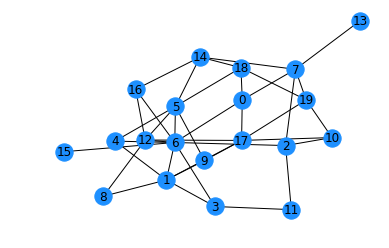

In [9]:
# Graficar el grafo

mis.graph.show_graph()
print()

mis.plot_graph(whit_mis=False)

Evaluating subsets...

Execution time 154.4573163 seconds

Maximum independent set = {0, 2, 3, 4, 8, 9, 13, 14, 15, 19}



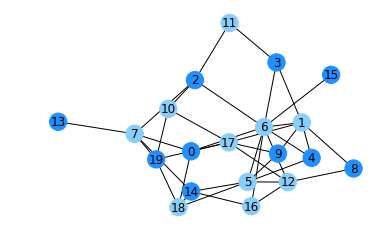

In [10]:
# Graficar el grafo con mis

mis_result, time = mis.maximum_independent_set2(verbose=False)

print('\nExecution time {} seconds'.format(time))

print('\nMaximum independent set = {}\n'.format(mis_result))

mis.plot_graph(whit_mis=True)

In [15]:
# Si el algoritmo tarda mucho, pasar a minutos

print('\nExecution time {} minutes'.format(time/60))


Execution time 2.574288605 minutes
